In [ ]:
Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [79]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [68]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

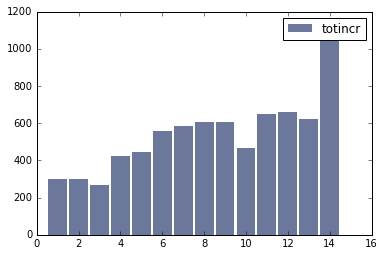

In [4]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

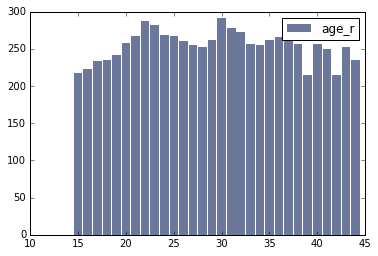

In [5]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

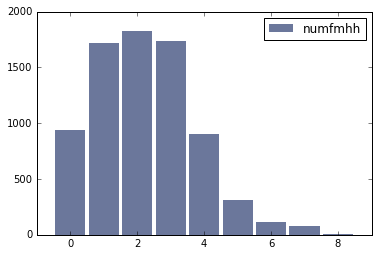

In [13]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label = 'numfmhh')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

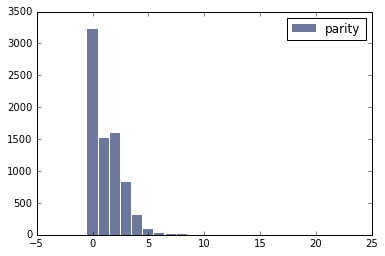

In [49]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label = 'parity')
thinkplot.Show()

# This distribution is has a small spread, a tail, and a central tendency around 0

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [20]:
# Get the five largest values of parity
hist.Largest(5)

[(22, 1), (16, 1), (10, 3), (9, 2), (8, 8)]

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

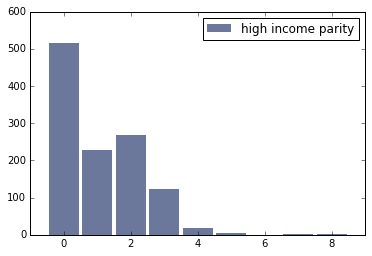

In [42]:
highest_income = resp[resp.totincr == resp.totincr.max()]
hist = thinkstats2.Hist(highest_income.parity)
thinkplot.Hist(hist, label='high income parity')
thinkplot.Show()

Find the largest parities for high income respondents.

In [43]:
# Five largest values of high income parity
hist.Largest(5)

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [62]:
not_highest_income = resp[resp.totincr != resp.totincr.max()]
mean_diff = not_highest_income.parity.mean() - highest_income.parity.mean()
print "High income mothers have on average ", mean_diff, " fewer children already when giving birth."

High income mothers have on average  0.173713744701  fewer children already when giving birth.


Investigate any other variables that look interesting.

In [76]:
no_college_degree_hispanic = resp[(resp.hieduc <= 10) & (resp.hispanic == 1)]
college_degree_hispanic = resp[(resp.hieduc > 10) & (resp.hispanic == 1)]

no_college_degree_nonhispanic = resp[(resp.hieduc <= 10) & (resp.hispanic == 2)]
college_degree_nonhispanic = resp[(resp.hieduc > 10) & (resp.hispanic == 2)]

percent_hispanic_college_degree = (float(len(college_degree_hispanic))/(len(college_degree_hispanic) + len(no_college_degree_hispanic)))*100
percent_nonhispanic_college_degree = (float(len(college_degree_nonhispanic))/(len(college_degree_nonhispanic) + len(no_college_degree_nonhispanic)))*100
print percent_hispanic_college_degree, "% of hispanic respondents have college degrees."
print percent_nonhispanic_college_degree, "% of non-hispanic respondents have college degrees. Wow."

15.796098175 % of hispanic respondents have college degrees.
31.2851007598 % of non-hispanic respondents have college degrees. Wow.


    ### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [93]:
import nsfg
import math
df = nsfg.ReadFemPreg()

first_baby = df[df.birthord == 1]
others = df[df.birthord != 1]

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d


d_totalwgt = CohenEffectSize(first_baby.totalwgt_lb, others.totalwgt_lb)
d_prglngth = CohenEffectSize(first_baby.prglngth, others.prglngth)

print "Cohen's d for total_wgt category: ", d_totalwgt
print "Cohen's d for preg_lngth category: ", d_prglngth




 Cohen's d for total_wgt category:  -0.0889364117772
Cohen's d for preg_lngth category:  1.09300834336
